In [2]:
import sys
sys.path.append('../')

In [3]:
from scripts.utils import data_path, set_mpl
from scripts.cross_match_scripts import fits_to_pandas, pandas_to_fits, decode_str_columns
import pandas as pd
from tqdm import tqdm
import numpy as np
import seaborn as sns
from astropy.coordinates import SkyCoord
import astropy.coordinates 
import astropy.units as u
import astroquery

%matplotlib inline

load DESI counterparts

In [4]:
desi = pd.read_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14_desi_nway_match.gz_pkl', compression='gzip')
desi.reset_index(drop=True, inplace=True)
desi[['nway_desi_id', 'desi_ra', 'desi_dec']].to_csv(data_path+'desi_LH_coords.csv', index=False)
desi.head(10)

,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,nway_desi_id,nway_Separation_EROSITA_DESI,nway_prob_has_match,nway_prob_this_match,nway_nnmag_grzw1w2w3w4,nway_nnmag_grzw1w2,nway_nnmag_grz,nway_n_match_flag_0,nway_n_match_flag_2,nway_is_duplicated,nway_is_confused,desi_release,desi_objid,desi_brickid,desi_ra,desi_dec,desi_flux_g,desi_flux_r,desi_flux_z,desi_flux_w1,desi_flux_w2,desi_flux_w3,desi_flux_w4,desi_flux_ivar_g,desi_flux_ivar_r,desi_flux_ivar_z,desi_flux_ivar_w1,desi_flux_ivar_w2,desi_flux_ivar_w3,desi_flux_ivar_w4,desi_dered_mag_g,desi_dered_mag_r,desi_dered_mag_z,desi_dered_mag_w1,desi_dered_mag_w2,desi_dered_mag_w3,desi_dered_mag_w4
0,SRGe J101903.3+563020,154.763934,56.505585,154.966043,50.066118,9.267930,15.858959,2.171120e-14,5.650445e-15,28.800014,7.495345,1211.871216,0.0,0.0,0.0,6207,5146,154.765943,56.504295,4.058504,102.778427,0.000023,6.268413e+08,6.270701e+08,0.0,0.0,0.023765,0.006185,7.077317,154.763934,56.505585,853324209744036352,7.576342,1,0,20.950485,-1.0,0,SDSS J101902.92+563016.4,0.949746,QSO,7.576898,1,0,0,2,16.915001,16.554001,12.382,12.1,5.0,0.7,2,1,1,1237658303814435106,9216733310671409152,7.544174,68469189470,4.058504,3.313348,5.001804,8.110237,132.352465,42.185604,1.670761e-14,1.526396e+20,9011_606779_231,5.167984,0.983660,0.983020,-99.000000,0.973052,0.887623,14,0,False,False,9011,231,606779,154.762154,56.504538,3.362170,4.618722,5.989522,16.031805,20.984790,50.180990,-3.493270,435.342250,248.158630,104.400180,3.761635,0.939089,0.001432,0.000018,21.087423,20.774010,20.520338,19.482046,19.191862,18.247932,NaN
1,SRGe J101903.4+563325,154.764302,56.556994,154.897407,50.039645,12.232697,16.660557,2.758328e-14,6.850312e-15,34.209091,8.495835,1133.034668,0.0,0.0,0.0,4806,3902,154.766311,56.555705,5.407337,163.025894,0.000029,6.268413e+08,6.270701e+08,0.0,0.0,0.030192,0.007498,6.562579,154.764302,56.556994,-1,-1.000000,0,-1,NaN,-1.0,-1,SDSS J101904.67+563333.2,1.464000,QSO,13.943999,1,0,0,-1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,-1,0,0,NaN,68265812198,5.407337,4.373272,6.601858,10.704663,132.318989,42.230639,2.122641e-14,1.507868e+20,9011_606779_284,12.929691,0.606908,0.872974,0.961661,0.975168,0.823176,9,0,False,False,9011,284,606779,154.769507,56.559155,4.110681,6.741001,7.775545,18.952187,29.332830,65.296720,371.384800,259.819270,99.752320,72.978060,3.654050,0.866400,0.001278,0.000015,20.872555,20.365770,20.238258,19.300547,18.828358,17.962076,16.075178
2,SRGe J101911.0+562639,154.795822,56.444182,155.033709,50.112976,7.855049,18.953989,1.654359e-14,3.709296e-15,40.391277,9.056271,2230.516357,0.0,0.0,0.0,4530,3655,154.797830,56.442893,3.409649,142.069946,0.000015,6.268413e+08,6.270701e+08,0.0,0.0,0.018108,0.004060,12.856621,154.795822,56.444182,-1,-1.000000,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.000000,0,0,0,-1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,-1,0,0,NaN,68713641563,3.409649,2.808233,4.239287,6.873844,132.413453,42.140474,1.273093e-14,1.537238e+20,9011_606779_455,15.145586,0.000003,0.900838,-99.000000,0.103009,0.213531,7,0,False,False,9011,455,606779,154.798428,56.448135,0.261824,0.279961,0.433191,0.675604,1.692767,-50.740715,326.340500,409.680970,145.013170,117.516495,4.582493,1.061522,0.001434,0.000018,23.850270,23.811726,23.368849,22.919775,21.924826,NaN,16.215527
3,SRGe J101914.3+563109,154.809447,56.519165,154.927665,50.080552,18.357738,9.770685,1.461044e-14,4.307066e-15,28.471239,8.393143,1780.289429,0.0,0.0,0.0,7154,6033,154.811456,56.517875,8.171203,102.778427,0.000021,6.268413e+08,6.270701e+08,0.0,0.0,0.015992,0.004714,10.505683,154.809447,56.5

# XMATCH

http://cdsxmatch.u-strasbg.fr/

## with GAIA

https://vizier.cfa.harvard.edu/viz-bin/VizieR-3?-source=I/355/gaiadr3

In [5]:
xmatch_gaia = pd.read_csv(data_path+'desi_LH_coords_gaiadr3.csv')
xmatch_gaia = xmatch_gaia.sort_values(by=['nway_desi_id', 'angDist'], ascending=True)
xmatch_gaia.drop_duplicates(subset = ['nway_desi_id'], keep='first', inplace=True) #get the closest match for each desi object
new_cols = ['GAIA_'+x  if 'desi' not in x  else x  for x in xmatch_gaia.columns]
xmatch_gaia.columns = new_cols
xmatch_gaia.sample(5)

,GAIA_angDist,nway_desi_id,desi_ra,desi_dec,GAIA_DR3Name,GAIA_RAdeg,GAIA_DEdeg,GAIA_errHalfMaj,GAIA_errHalfMin,GAIA_errPosAng,GAIA_SolID,GAIA_Source,GAIA_RandomI,GAIA_e_RAdeg,GAIA_e_DEdeg,GAIA_Plx,GAIA_e_Plx,GAIA_RPlx,GAIA_PM,GAIA_pmRA,GAIA_e_pmRA,GAIA_pmDE,GAIA_e_pmDE,GAIA_RADEcor,GAIA_RAPlxcor,GAIA_RApmRAcor,GAIA_RApmDEcor,GAIA_DEPlxcor,GAIA_DEpmRAcor,GAIA_DEpmDEcor,GAIA_PlxpmRAcor,GAIA_PlxpmDEcor,GAIA_pmRApmDEcor,GAIA_NAL,GAIA_NAC,GAIA_NgAL,GAIA_NbAL,GAIA_gofAL,GAIA_chi2AL,GAIA_epsi,GAIA_sepsi,GAIA_Solved,GAIA_APF,GAIA_nueff,GAIA_pscol,GAIA_e_pscol,GAIA_RApscolCorr,GAIA_DEpscolCorr,GAIA_PlxpscolCorr,GAIA_pmRApscolCorr,GAIA_pmDEpscolCorr,GAIA_MatchObsA,GAIA_Nper,GAIA_amax,GAIA_MatchObs,GAIA_IPDgofha,GAIA_IPDgofhp,GAIA_IPDfmp,GAIA_IPDfow,GAIA_RUWE,GAIA_Dup,GAIA_o_Gmag,GAIA_FG,GAIA_e_FG,GAIA_RFG,GAIA_Gmag,GAIA_e_Gmag,GAIA_o_BPmag,GAIA_FBP,GAIA_e_FBP,GAIA_RFBP,GAIA_BPmag,GAIA_e_BPmag,GAIA_o_RPmag,GAIA_FRP,GAIA_e_FRP,GAIA_RFRP,GAIA_RPmag,GAIA_e_RPmag,GAIA_E(BP/RP),GAIA_NBPcont,GAIA_NBPblend,GAIA_NRPcont,GAIA_NRPblend,GAIA_Mode,GAIA_BP-RP,GAIA_BP-G,GAIA_G-RP,GAIA_RV,GAIA_e_RV,GAIA_n_RV,GAIA_o_RV,GAIA_o_RVd,GAIA_RVNper,GAIA_RVS/N,GAIA_RVgof,GAIA_RVchi2,GAIA_RVTdur,GAIA_RVamp,GAIA_RVtempTeff,GAIA_RVtemplogg,GAIA_RVtemp[Fe/H],GAIA_Vatmparam,GAIA_vbroad,GAIA_e_Vbroad,GAIA_o_Vbroad,GAIA_GRVSmag,GAIA_e_GRVSmag,GAIA_o_GRVSmag,GAIA_RVSS/N,GAIA_VarFlag,GAIA_PQSO,GAIA_PGal,GAIA_PSS,GAIA_Teff,GAIA_b_Teff,GAIA_B_Teff,GAIA_logg,GAIA_b_logg,GAIA_B_logg,GAIA_[Fe/H],GAIA_b_[Fe/H],GAIA_B_[Fe/H],GAIA_Dist,GAIA_b_Dist,GAIA_B_Dist,GAIA_A0,GAIA_b_A0,GAIA_B_A0,GAIA_AG,GAIA_b_AG,GAIA_B_AG,GAIA_E(BP-RP),GAIA_b_E(BP-RP),GAIA_B_E(BP-RP),GAIA_Lib,GAIA_RAJ2000,GAIA_DEJ2000,GAIA_e_RAJ2000,GAIA_e_DEJ2000,GAIA_RADEcorJ2000
1376,0.020879,9011_611494_2998,162.952151,58.028380,Gaia DR3 854461822031004544,162.952141,58.028378,0.000,0.0,33,1636148068921376768,854461822031004544,376045904,0.0207,0.0251,2.6472,0.0340,77.8084,41.463,-38.852,0.026,-14.481,0.033357,0.4186,-0.1883,-0.3056,-0.1417,-0.0969,-0.1668,-0.2660,0.1759,-0.0257,0.3945,623,0,620,3,17.8421,1484.90,0.249,19.4140,31,0,1.340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72,29,0.050681,75,0.01126,65.78,7,1,1.549,0,618,1.741821e+04,9.549810,1823.930,15.084858,0.002819,71,4.948470e+03,12.58100,393.32700,16.102365,0.003925,67,1.882350e+04,21.99980,855.62000,14.061148,0.003987,1.365,0.0,71.0,0.0,67.0,0,2.041218,1.017508,1.023710,2.02,5.29,2.0,32.0,3.0,20.0,7.8815,NaN,NaN,959.135,NaN,3800.0,4.5,-0.25,101.0,NaN,NaN,NaN,13.543261,0.058118,33.0,NaN,NOT_AVAILABLE,0.000000,0.000000,0.992964,3881.8,3877.2,3886.5,4.1286,4.0946,4.1523,-0.1225,-0.1477,-0.0950,405.8386,395.4138,421.0745,0.6132,0.6057,0.6205,0.4289,0.4235,0.4340,0.2431,0.2401,0.2460,MARCS,162.952467,58.028442,0.418831,0.540947,0.3985
2026,0.024712,9011_603553_3101,159.774676,55.512338,Gaia DR3 850605735964206592,159.774685,55.512333,0.000,0.0,6,1636148068921376768,850605735964206592,883800384,0.0113,0.0156,18.1087,0.0182,996.1243,49.415,34.855,0.015,-35.028,0.020528,0.0678,-0.1106,0.1408,-0.1112,-0.1773,-0.1189,-0.4894,0.0849,-0.0147,0.0370,439,439,434,5,1.9289,1058.50,0.109,11.7650,31,1,1.558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,24,0.029702,53,0.01925,26.05,2,0,1.066,0,425,7.643265e+06,1586.290000,4818.320,8.479170,0.002765,52,4.119410e+06,2296.95000,1793.43000,8.801454,0.002855,52,5.063450e+06,1998.30000,2533.88000,7.986779,0.003804,1.201,0.0,52.0,0.0,52.0,0,0.814674,0.322284,0.492391,-22.06,0.13,1.0,21.0,4.0,15.0,252.5400,-1.121,0.64637,956.632,1.04,5750.0,4.5,0.00,222.0,6.2999,2.1259,15.0,7.808540,0.005262,16.0,NaN,NOT_AVAILABLE,0.000000,0.000000,0.996487,5668.7,5666.7,5672.8,4.3680,4.3666,4.3706,-0.1863,-0.1948,-0.1631,55.0240,54.9504,55.1163,0.0006,0.0001,0.0013,0.0005,0.0001,0.0011,0.0003,0.0000,0.0006,MARCS,159.774411,55.512488,0.236294,0.336331,0.0472
192,0.000468,9011_605982_1249,156.898509,56.186366,Gaia DR3 854568440294675072,156.898509,56.186366,0.000,0.0,34,1636148068921376768,854568440294675072,678496755,0.2524,0.2691,-0.2324,0.3748,-0.6201,0.611,0.598,0.348,-0

In [6]:
xmatch_gaia.GAIA_angDist.describe()

count    2971.000000
mean        0.008749
std         0.021654
min         0.000008
25%         0.000323
50%         0.001041
75%         0.006270
max         0.239019
Name: GAIA_angDist, dtype: float64

In [7]:
desi_gaia = desi.merge(xmatch_gaia, on=['nway_desi_id', 'desi_ra', 'desi_dec'], how='right')

In [8]:
# from astroquery.xmatch import XMatch

# gaia_table = XMatch.query(cat1=open(data_path+'nway_desi_LH.csv'),
#                       #cat2='I/355/gaiadr3',
#                         cat2='vizier:II/246/out',
#                       max_distance=1.5 * u.arcsec,
#                       colRA1='ra', colDec1='dec')

## with SDSS DR16

https://vizier.cfa.harvard.edu/viz-bin/VizieR?-source=V/154

In [9]:
xmatch_sdss = pd.read_csv(data_path+'desi_LH_coords_sdssdr16.csv')
xmatch_sdss = xmatch_sdss.sort_values(by=['nway_desi_id', 'angDist'], ascending=True)
xmatch_sdss = xmatch_sdss.query('~spCl.isna()') #remove objects without classification
xmatch_sdss.drop_duplicates(subset = ['nway_desi_id'], keep='first', inplace=True) # get the closest match for each desi object
new_cols = ['SDSS_'+x  if 'desi' not in x  else x  for x in xmatch_sdss.columns]
xmatch_sdss.columns = new_cols
xmatch_sdss

,SDSS_angDist,nway_desi_id,desi_ra,desi_dec,SDSS_objID,SDSS_RA_ICRS,SDSS_DE_ICRS,SDSS_errHalfMaj,SDSS_errHalfMin,SDSS_errPosAng,SDSS_mode,SDSS_class,SDSS_clean,SDSS_e_RA_ICRS,SDSS_e_DE_ICRS,SDSS_umag,SDSS_gmag,SDSS_rmag,SDSS_imag,SDSS_zmag,SDSS_e_umag,SDSS_e_gmag,SDSS_e_rmag,SDSS_e_imag,SDSS_e_zmag,SDSS_zsp,SDSS_e_zsp,SDSS_f_zsp,SDSS_spCl,SDSS_subCl,SDSS_pmRA,SDSS_pmDE,SDSS_e_pmRA,SDSS_e_pmDE,SDSS_sigRA,SDSS_sigDE,SDSS_zph,SDSS_e_zph,SDSS_<zph>,SDSS_Q,SDSS_SDSS16,SDSS_Sp-ID,SDSS_MJD
10290,0.044010,9011_598549_854,161.461856,54.123404,1237657769639215311,161.461870,54.123395,0.009,0.009,90,1,6,1,0.009,0.009,20.246,20.042,19.707,19.422,19.360,0.048,0.019,0.017,0.019,0.068,1.50396,0.00034,0.0,QSO,BROADLINE,2.73,-2.14,4.05,4.05,551.72,359.62,NaN,NaN,NaN,3,SDSS J104550.84+540724.2,8173-57375-0981,52283.3136
7645,0.057747,9011_599395_499,160.853456,54.274962,1237657220412145758,160.853442,54.274976,0.006,0.006,90,1,6,1,0.006,0.006,19.061,18.911,18.796,18.958,18.987,0.022,0.009,0.010,0.014,0.041,0.97346,0.00020,0.0,QSO,BROADLINE,-0.40,3.69,3.27,3.27,123.74,160.18,NaN,NaN,NaN,3,SDSS J104324.82+541629.9,906-52368-0132,52233.4896
10228,0.039859,9011_599396_2176,161.434078,54.186100,1237657769639215423,161.434088,54.186090,0.016,0.015,90,1,6,1,0.016,0.015,20.942,20.626,20.501,20.456,20.159,0.078,0.028,0.029,0.041,0.126,0.77491,0.00021,0.0,QSO,BROADLINE,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,3,SDSS J104544.18+541109.9,8173-57375-0968,52283.3136
10330,0.062339,9011_599396_2647,161.485139,54.201269,1237657769639215439,161.485150,54.201253,0.022,0.022,0,1,6,1,0.022,0.022,21.109,20.977,20.796,20.603,20.659,0.091,0.037,0.037,0.047,0.198,2.02040,0.00065,0.0,QSO,NaN,4.76,22.89,3.98,3.98,183.09,966.04,NaN,NaN,NaN,3,SDSS J104556.43+541204.5,8173-57375-0982,52283.3136
10558,0.045899,9011_599396_3413,161.572180,54.348553,1237657220412342517,161.572202,54.348552,0.018,0.017,90,1,6,1,0.018,0.017,20.714,20.464,20.224,20.062,19.923,0.070,0.022,0.028,0.030,0.091,1.56729,0.00049,0.0,QSO,BROADLINE,4.49,1.37,5.73,5.73,177.99,137.70,NaN,NaN,NaN,3,SDSS J104617.32+542054.7,8172-57423-0496,52233.4908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7539,0.023750,9011_620307_2187,160.809061,60.958682,1237653618545066138,160.809054,60.958677,0.008,0.008,90,1,6,1,0.008,0.008,19.718,19.620,19.204,19.151,19.190,0.033,0.014,0.013,0.019,0.065,1.19342,0.00021,0.0,QSO,BROADLINE,2.86,-3.62,3.44,3.44,173.41,196.74,NaN,NaN,NaN,3,SDSS J104314.17+605731.2,7096-56683-0660,51875.4578
8987,0.033750,9011_620307_596,160.596115,61.117255,1237655370893688838,160.596104,61.117247,0.003,0.003,90,1,6,1,0.003,0.003,18.343,18.086,17.878,17.909,17.913,0.014,0.006,0.006,0.008,0.021,0.95777,0.00024,0.0,QSO,BROADLINE,1.73,-0.67,2.95,2.95,140.93,133.36,NaN,NaN,NaN,3,SDSS J104223.06+610702.0,561-52295-0376,52047.1623
11586,0.115783,9011_620308_1164,161.198300,61.025895,1237653618545131614,161.198234,61.025889,0.015,0.015,90,1,6,1,0.015,0.015,20.639,20.070,19.808,19.696,19.666,0.062,0.018,0.020,0.027,0.101,0.78407,0.00004,0.0,QSO,BROADLINE,-1.53,2.06,3.72,3.72,215.13,93.35,NaN,NaN,NaN,3,SDSS J104447.57+610133.2,7096-56683-0700,51875.4582
9207,0.091026,9011_621005_665,159.919707,61.235864,1237653619081805917,159.919684,61.235842,0.017,0.017,90,1,6,1,0.017,0.017,20.383,20.058,20.004,20.002,19.571,0.059,0.018,0.023,0.035,0.094,0.79690,0.00014,0.0,QSO,NaN,0.30,-1.49,3.98,3.98,208.10,192.48,NaN,NaN,NaN,3,SDSS J103940.72+611409.0,561-52295-0330,51875.4569


In [10]:
xmatch_sdss.groupby(['SDSS_spCl']).SDSS_subCl.value_counts()

SDSS_spCl  SDSS_subCl 
GALAXY     STARFORMING      33
           AGN              16
           STARBURST        14
           BROADLINE        10
QSO        BROADLINE      1625
           STARBURST        60
           AGN               6
           STARFORMING       3
STAR       O9.5Iae           2
           F9                1
           O8e               1
Name: SDSS_subCl, dtype: int64

In [11]:
desi_sdss = desi.merge(xmatch_sdss, on=['nway_desi_id', 'desi_ra', 'desi_dec'], how='right')


## with SIMBAD

In [12]:
# xmatch_simbad = pd.read_csv(data_path+'desi_LH_coords_simbad.csv')
# xmatch_simbad = xmatch_simbad.sort_values(by=['nway_desi_id', 'angDist'], ascending=True)
# #xmatch_simbad.drop_duplicates(subset = ['nway_desi_id'], keep='first', inplace=True) # get the closest match for each desi object
# new_cols = ['XMATCH_Simbad_'+x  if 'desi' not in x  else x  for x in xmatch_simbad.columns]
# xmatch_simbad.columns = new_cols
# xmatch_simbad

# Join SDSS-GAIA matches

In [113]:
#merge desi_gaia with desi_sdss with desi to create a new desi_gaia_sdss catalog 
#https://stackoverflow.com/questions/44327999/python-pandas-merge-multiple-dataframes
from functools import reduce
data_frames = [desi, desi_gaia, desi_sdss]

desi_gaia_sdss = reduce(lambda  left,right: pd.merge(left,right,on=list(desi.columns.values),
                                            how='outer'), data_frames).fillna(np.nan)

desi_gaia_sdss


,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,nway_desi_id,nway_Separation_EROSITA_DESI,nway_prob_has_match,nway_prob_this_match,nway_nnmag_grzw1w2w3w4,nway_nnmag_grzw1w2,nway_nnmag_grz,nway_n_match_flag_0,nway_n_match_flag_2,nway_is_duplicated,nway_is_confused,desi_release,desi_objid,desi_brickid,desi_ra,desi_dec,desi_flux_g,desi_flux_r,desi_flux_z,desi_flux_w1,desi_flux_w2,desi_flux_w3,desi_flux_w4,desi_flux_ivar_g,desi_flux_ivar_r,desi_flux_ivar_z,desi_flux_ivar_w1,desi_flux_ivar_w2,desi_flux_ivar_w3,desi_flux_ivar_w4,desi_dered_mag_g,desi_dered_mag_r,desi_dered_mag_z,desi_dered_mag_w1,desi_dered_mag_w2,desi_dered_mag_w3,desi_dered_mag_w4,GAIA_angDist,GAIA_DR3Name,GAIA_RAdeg,GAIA_DEdeg,GAIA_errHalfMaj,GAIA_errHalfMin,GAIA_errPosAng,GAIA_SolID,GAIA_Source,GAIA_RandomI,GAIA_e_RAdeg,GAIA_e_DEdeg,GAIA_Plx,GAIA_e_Plx,GAIA_RPlx,GAIA_PM,GAIA_pmRA,GAIA_e_pmRA,GAIA_pmDE,GAIA_e_pmDE,GAIA_RADEcor,GAIA_RAPlxcor,GAIA_RApmRAcor,GAIA_RApmDEcor,GAIA_DEPlxcor,GAIA_DEpmRAcor,GAIA_DEpmDEcor,GAIA_PlxpmRAcor,GAIA_PlxpmDEcor,GAIA_pmRApmDEcor,GAIA_NAL,GAIA_NAC,GAIA_NgAL,GAIA_NbAL,GAIA_gofAL,GAIA_chi2AL,GAIA_epsi,GAIA_sepsi,GAIA_Solved,GAIA_APF,GAIA_nueff,GAIA_pscol,GAIA_e_pscol,GAIA_RApscolCorr,GAIA_DEpscolCorr,GAIA_PlxpscolCorr,GAIA_pmRApscolCorr,GAIA_pmDEpscolCorr,GAIA_MatchObsA,GAIA_Nper,GAIA_amax,GAIA_MatchObs,GAIA_IPDgofha,GAIA_IPDgofhp,GAIA_IPDfmp,GAIA_IPDfow,GAIA_RUWE,GAIA_Dup,GAIA_o_Gmag,GAIA_FG,GAIA_e_FG,GAIA_RFG,GAIA_Gmag,GAIA_e_Gmag,GAIA_o_BPmag,GAIA_FBP,GAIA_e_FBP,GAIA_RFBP,GAIA_BPmag,GAIA_e_BPmag,GAIA_o_RPmag,GAIA_FRP,GAIA_e_FRP,GAIA_RFRP,GAIA_RPmag,GAIA_e_RPmag,GAIA_E(BP/RP),GAIA_NBPcont,GAIA_NBPblend,GAIA_NRPcont,GAIA_NRPblend,GAIA_Mode,GAIA_BP-RP,GAIA_BP-G,GAIA_G-RP,GAIA_RV,GAIA_e_RV,GAIA_n_RV,GAIA_o_RV,GAIA_o_RVd,GAIA_RVNper,GAIA_RVS/N,GAIA_RVgof,GAIA_RVchi2,GAIA_RVTdur,GAIA_RVamp,GAIA_RVtempTeff,GAIA_RVtemplogg,GAIA_RVtemp[Fe/H],GAIA_Vatmparam,GAIA_vbroad,GAIA_e_Vbroad,GAIA_o_Vbroad,GAIA_GRVSmag,GAIA_e_GRVSmag,GAIA_o_GRVSmag,GAIA_RVSS/N,GAIA_VarFlag,GAIA_PQSO,GAIA_PGal,GAIA_PSS,GAIA_Teff,GAIA_b_Teff,GAIA_B_Teff,GAIA_logg,GAIA_b_logg,GAIA_B_logg,GAIA_[Fe/H],GAIA_b_[Fe/H],GAIA_B_[Fe/H],GAIA_Dist,GAIA_b_Dist,GAIA_B_Dist,GAIA_A0,GAIA_b_A0,GAIA_B_A0,GAIA_AG,GAIA_b_AG,GAIA_B_AG,GAIA_E(BP-RP),GAIA_b_E(BP-RP),GAIA_B_E(BP-RP),GAIA_Lib,GAIA_RAJ2000,GAIA_DEJ2000,GAIA_e_RAJ2000,GAIA_e_DEJ2000,GAIA_RADEcorJ2000,SDSS_angDist,SDSS_objID,SDSS_RA_ICRS,SDSS_DE_ICRS,SDSS_errHalfMaj,SDSS_errHalfMin,SDSS_errPosAng,SDSS_mode,SDSS_class,SDSS_clean,SDSS_e_RA_ICRS,SDSS_e_DE_ICRS,SDSS_umag,SDSS_gmag,SDSS_rmag,SDSS_imag,SDSS_zmag,SDSS_e_umag,SDSS_e_gmag,SDSS_e_rmag,SDSS_e_imag,SDSS_e_zmag,SDSS_zsp,SDSS_e_zsp,SDSS_f_zsp,SDSS_spCl,SDSS_subCl,SDSS_pmRA,SDSS_pmDE,SDSS_e_pmRA,SDSS_e_pmDE,SDSS_sigRA,SDSS_sigDE,SDSS_zph,SDSS_e_zph,SDSS_<zph>,SDSS_Q,SDSS_SDSS16,SDSS_Sp-ID,SDSS_MJD
0,SRGe J101903.3+563020,154.763934,56.505585,154.966043,50.066118,9.267930,15.858959,2.171120e-14,5.650445e-15,28.800014,7.495345,1211.871216,0.0,0.0,0.0,6207,5146,154.765943,56.504295,4.058504,102.778427,0.000023,6.268413e+08,6.270701e+08,0.0,0.0,0.023765,0.006185,7.077317,154.763934,56.505585,853324209744036352,7.576342,1,0,20.950485,-1.0,0,SDSS J101902.92+563016.4,0.949746,QSO,7.576898,1,0,0,2,16.915001,16.554001,12.382,12.1,5.0,0.7,2,1,1,1237658303814435106,9216733310671409152,7.544174,68469189470,4.058504,3.313348,5.001804,8.110237,132.352465,42.185604,1.670761e-14,1.526396e+20,9011_606779_231,5.167984,0.983660,0.983020,-99.000000,0.973052,0.887623,14,0,False,False,9011,231,606779,154.762154,56.504538,3.362170,4.6

In [114]:
print(np.sum(desi_gaia_sdss.GAIA_PQSO>0.9))
print(len(desi_gaia_sdss.query("SDSS_spCl=='QSO'")))
print(np.sum(desi_gaia_sdss.query("SDSS_spCl=='QSO'").GAIA_PQSO>0.9))

1508
2129
1257


In [115]:
print(desi_gaia_sdss.SDSS_spCl.value_counts())
print('***')

QSO       2129
GALAXY     317
STAR         5
Name: SDSS_spCl, dtype: int64
***


In [126]:
#[x for x in desi_gaia_sdss.columns if 'SDSS' in x]

## preliminary classification

GAIA

In [137]:

th = 0.9
qso_mask = desi_gaia_sdss.eval('(GAIA_PQSO > @th) ')
desi_gaia_sdss.loc[qso_mask, 'class_GAIA_class'] = 'QSO'

galaxy_mask = desi_gaia_sdss.eval('(GAIA_PGal > @th) ')
desi_gaia_sdss.loc[galaxy_mask, 'class_GAIA_class'] = 'GALAXY'

star_mask = desi_gaia_sdss.eval('GAIA_PSS > @th')
desi_gaia_sdss.loc[star_mask, 'class_GAIA_class'] = 'STAR_SINGLE'




th = 3
star_mask = desi_gaia_sdss.eval('(GAIA_RPlx > @th) | (GAIA_pmRA/GAIA_e_pmRA > @th) | (GAIA_pmDE/GAIA_e_pmDE > @th)')
desi_gaia_sdss.loc[star_mask, 'class_GAIA_class'] = 'STAR'

#desi_gaia_sdss.loc[desi_gaia_sdss.class_GAIA_class.isna() & ~desi_gaia_sdss.GAIA_DR3Name.isna(), 'class_GAIA_class'] = 'undef'


In [138]:
print('NOTE NANS ARE NOT PRINTER IN .value_counts()')
desi_gaia_sdss.class_GAIA_class.value_counts()

NOTE NANS ARE NOT PRINTER IN .value_counts()


QSO            1503
STAR_SINGLE     600
STAR            486
GALAXY          249
Name: class_GAIA_class, dtype: int64

SDSS

In [139]:
sdss_class_mask = desi_gaia_sdss.eval('~SDSS_spCl.isna() ')
desi_gaia_sdss.loc[sdss_class_mask, 'class_SDSS_class'] = desi_gaia_sdss.SDSS_spCl[sdss_class_mask]
assert len(desi_sdss.SDSS_spCl) == np.sum(sdss_class_mask), f'SDSS_spCl and class_SDSS_class have different lengths {len(desi_sdss.SDSS_spCl)} {len(desi_gaia_sdss.class_SDSS_class)}'

In [140]:
desi_gaia_sdss.class_SDSS_class.value_counts()

QSO       2129
GALAXY     317
STAR         5
Name: class_SDSS_class, dtype: int64

In [141]:
desi_gaia_sdss.groupby('class_SDSS_class').class_GAIA_class.value_counts()

class_SDSS_class  class_GAIA_class
GALAXY            GALAXY               143
                  STAR_SINGLE           50
                  QSO                    8
                  STAR                   4
QSO               QSO                 1254
                  STAR_SINGLE          248
                  GALAXY                26
                  STAR                   9
STAR              QSO                    4
                  STAR                   1
Name: class_GAIA_class, dtype: int64

In [142]:
desi_gaia_sdss.groupby('class_GAIA_class').class_SDSS_class.value_counts()

class_GAIA_class  class_SDSS_class
GALAXY            GALAXY               143
                  QSO                   26
QSO               QSO                 1254
                  GALAXY                 8
                  STAR                   4
STAR              QSO                    9
                  GALAXY                 4
                  STAR                   1
STAR_SINGLE       QSO                  248
                  GALAXY                50
Name: class_SDSS_class, dtype: int64

When GAIA indicate star but SDSS says QSO

In [143]:
#[x for x in desi_gaia_sdss.columns if 'mag' in x]
mags_cols = ['desi_dered_mag_g', 'SDSS_gmag', 'GAIA_Gmag', 'desi_dered_mag_r', 'SDSS_rmag', 'desi_dered_mag_z', 'SDSS_zmag']
desi_gaia_sdss.query('class_SDSS_class=="QSO" & class_GAIA_class=="STAR"')[mags_cols]

,desi_dered_mag_g,SDSS_gmag,GAIA_Gmag,desi_dered_mag_r,SDSS_rmag,desi_dered_mag_z,SDSS_zmag
1507,19.502940,19.916,19.483557,19.268133,19.699,18.157497,18.263
1677,20.445957,20.548,20.179214,20.267962,20.207,20.223413,20.076
3993,19.136795,19.438,19.713089,18.189823,18.344,17.804039,17.914
5318,20.943506,21.067,20.807379,20.660255,20.919,20.562060,20.572
7340,16.285994,16.335,18.401281,15.611326,15.646,15.086662,14.970
7341,16.285994,16.335,18.401281,15.611326,15.646,15.086662,14.970
8173,18.684580,18.615,20.412914,17.616146,17.603,16.813606,16.702
8446,18.769289,19.423,19.332888,18.124111,18.369,17.429146,17.493
8921,20.144867,20.079,20.459467,20.229116,20.161,19.908102,19.993


wrap up classification

In [146]:
sdss_class_mask = desi_gaia_sdss.eval('~class_SDSS_class.isna() ')
desi_gaia_sdss.loc[sdss_class_mask, 'class_final'] = desi_gaia_sdss.class_SDSS_class[sdss_class_mask]

desi_gaia_sdss.loc[~sdss_class_mask, 'class_final'] = desi_gaia_sdss.class_GAIA_class[~sdss_class_mask]

desi_gaia_sdss.loc[desi_gaia_sdss.class_final.isna(), 'class_final'] = 'unknown'


In [147]:
print(desi_gaia_sdss.class_SDSS_class.value_counts())
desi_gaia_sdss.class_final.value_counts()

QSO       2129
GALAXY     317
STAR         5
Name: class_SDSS_class, dtype: int64


unknown        5958
QSO            2366
STAR            477
GALAXY          397
STAR_SINGLE     302
Name: class_final, dtype: int64

<AxesSubplot:xlabel='SDSS_zsp', ylabel='Count'>

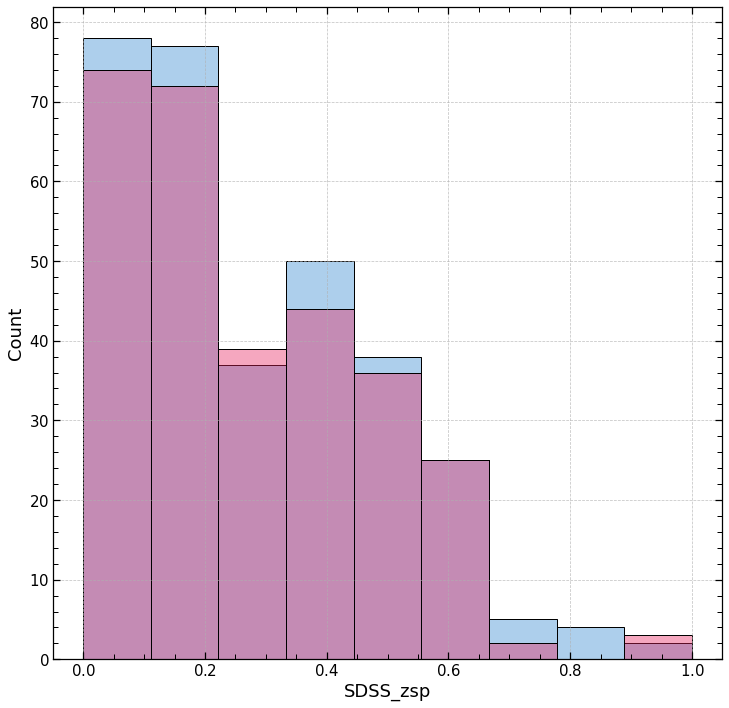

In [158]:
fig,  ax =  plt.subplots( figsize = (12,12))
bins = np.linspace(0,1,10)
sns.histplot(desi_gaia_sdss.query('class_final=="GALAXY"').SDSS_zsp, ax = ax, alpha = 0.4,  bins = bins, label = 'zsp')
sns.histplot(desi_gaia_sdss.query('class_final=="GALAXY"').SDSS_zph, ax = ax, alpha = 0.4,  bins = bins, color = 'C1', label = 'zph')

<AxesSubplot:xlabel='SDSS_zsp', ylabel='Count'>

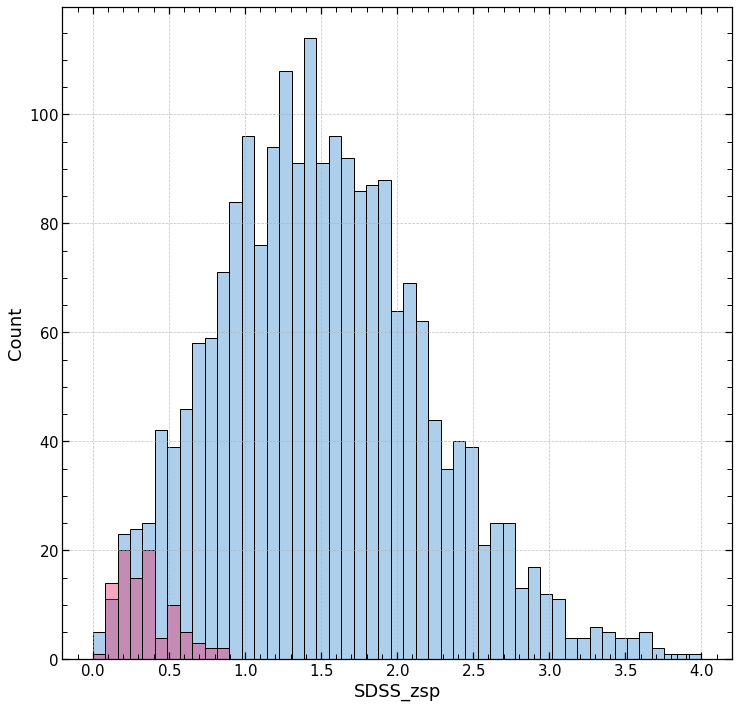

In [161]:
fig,  ax =  plt.subplots( figsize = (12,12))
bins = np.linspace(0,4,50)
sns.histplot(desi_gaia_sdss.query('class_final=="QSO"').SDSS_zsp, ax = ax, alpha = 0.4,  bins = bins, label = 'zsp')
sns.histplot(desi_gaia_sdss.query('class_final=="QSO"').SDSS_zph, ax = ax, alpha = 0.4,  bins = bins, color = 'C1', label = 'zph')

# Save match result

In [164]:
desi_gaia_sdss

,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,nway_desi_id,nway_Separation_EROSITA_DESI,nway_prob_has_match,nway_prob_this_match,nway_nnmag_grzw1w2w3w4,nway_nnmag_grzw1w2,nway_nnmag_grz,nway_n_match_flag_0,nway_n_match_flag_2,nway_is_duplicated,nway_is_confused,desi_release,desi_objid,desi_brickid,desi_ra,desi_dec,desi_flux_g,desi_flux_r,desi_flux_z,desi_flux_w1,desi_flux_w2,desi_flux_w3,desi_flux_w4,desi_flux_ivar_g,desi_flux_ivar_r,desi_flux_ivar_z,desi_flux_ivar_w1,desi_flux_ivar_w2,desi_flux_ivar_w3,desi_flux_ivar_w4,desi_dered_mag_g,desi_dered_mag_r,desi_dered_mag_z,desi_dered_mag_w1,desi_dered_mag_w2,desi_dered_mag_w3,desi_dered_mag_w4,GAIA_angDist,GAIA_DR3Name,GAIA_RAdeg,GAIA_DEdeg,GAIA_errHalfMaj,GAIA_errHalfMin,GAIA_errPosAng,GAIA_SolID,GAIA_Source,GAIA_RandomI,GAIA_e_RAdeg,GAIA_e_DEdeg,GAIA_Plx,GAIA_e_Plx,GAIA_RPlx,GAIA_PM,GAIA_pmRA,GAIA_e_pmRA,GAIA_pmDE,GAIA_e_pmDE,GAIA_RADEcor,GAIA_RAPlxcor,GAIA_RApmRAcor,GAIA_RApmDEcor,GAIA_DEPlxcor,GAIA_DEpmRAcor,GAIA_DEpmDEcor,GAIA_PlxpmRAcor,GAIA_PlxpmDEcor,GAIA_pmRApmDEcor,GAIA_NAL,GAIA_NAC,GAIA_NgAL,GAIA_NbAL,GAIA_gofAL,GAIA_chi2AL,GAIA_epsi,GAIA_sepsi,GAIA_Solved,GAIA_APF,GAIA_nueff,GAIA_pscol,GAIA_e_pscol,GAIA_RApscolCorr,GAIA_DEpscolCorr,GAIA_PlxpscolCorr,GAIA_pmRApscolCorr,GAIA_pmDEpscolCorr,GAIA_MatchObsA,GAIA_Nper,GAIA_amax,GAIA_MatchObs,GAIA_IPDgofha,GAIA_IPDgofhp,GAIA_IPDfmp,GAIA_IPDfow,GAIA_RUWE,GAIA_Dup,GAIA_o_Gmag,GAIA_FG,GAIA_e_FG,GAIA_RFG,GAIA_Gmag,GAIA_e_Gmag,GAIA_o_BPmag,GAIA_FBP,GAIA_e_FBP,GAIA_RFBP,GAIA_BPmag,GAIA_e_BPmag,GAIA_o_RPmag,GAIA_FRP,GAIA_e_FRP,GAIA_RFRP,GAIA_RPmag,GAIA_e_RPmag,GAIA_E(BP/RP),GAIA_NBPcont,GAIA_NBPblend,GAIA_NRPcont,GAIA_NRPblend,GAIA_Mode,GAIA_BP-RP,GAIA_BP-G,GAIA_G-RP,GAIA_RV,GAIA_e_RV,GAIA_n_RV,GAIA_o_RV,GAIA_o_RVd,GAIA_RVNper,GAIA_RVS/N,GAIA_RVgof,GAIA_RVchi2,GAIA_RVTdur,GAIA_RVamp,GAIA_RVtempTeff,GAIA_RVtemplogg,GAIA_RVtemp[Fe/H],GAIA_Vatmparam,GAIA_vbroad,GAIA_e_Vbroad,GAIA_o_Vbroad,GAIA_GRVSmag,GAIA_e_GRVSmag,GAIA_o_GRVSmag,GAIA_RVSS/N,GAIA_VarFlag,GAIA_PQSO,GAIA_PGal,GAIA_PSS,GAIA_Teff,GAIA_b_Teff,GAIA_B_Teff,GAIA_logg,GAIA_b_logg,GAIA_B_logg,GAIA_[Fe/H],GAIA_b_[Fe/H],GAIA_B_[Fe/H],GAIA_Dist,GAIA_b_Dist,GAIA_B_Dist,GAIA_A0,GAIA_b_A0,GAIA_B_A0,GAIA_AG,GAIA_b_AG,GAIA_B_AG,GAIA_E(BP-RP),GAIA_b_E(BP-RP),GAIA_B_E(BP-RP),GAIA_Lib,GAIA_RAJ2000,GAIA_DEJ2000,GAIA_e_RAJ2000,GAIA_e_DEJ2000,GAIA_RADEcorJ2000,SDSS_angDist,SDSS_objID,SDSS_RA_ICRS,SDSS_DE_ICRS,SDSS_errHalfMaj,SDSS_errHalfMin,SDSS_errPosAng,SDSS_mode,SDSS_class,SDSS_clean,SDSS_e_RA_ICRS,SDSS_e_DE_ICRS,SDSS_umag,SDSS_gmag,SDSS_rmag,SDSS_imag,SDSS_zmag,SDSS_e_umag,SDSS_e_gmag,SDSS_e_rmag,SDSS_e_imag,SDSS_e_zmag,SDSS_zsp,SDSS_e_zsp,SDSS_f_zsp,SDSS_spCl,SDSS_subCl,SDSS_pmRA,SDSS_pmDE,SDSS_e_pmRA,SDSS_e_pmDE,SDSS_sigRA,SDSS_sigDE,SDSS_zph,SDSS_e_zph,SDSS_<zph>,SDSS_Q,SDSS_SDSS16,SDSS_Sp-ID,SDSS_MJD,class_GAIA_class,class_SDSS_class,class_final
0,SRGe J101903.3+563020,154.763934,56.505585,154.966043,50.066118,9.267930,15.858959,2.171120e-14,5.650445e-15,28.800014,7.495345,1211.871216,0.0,0.0,0.0,6207,5146,154.765943,56.504295,4.058504,102.778427,0.000023,6.268413e+08,6.270701e+08,0.0,0.0,0.023765,0.006185,7.077317,154.763934,56.505585,853324209744036352,7.576342,1,0,20.950485,-1.0,0,SDSS J101902.92+563016.4,0.949746,QSO,7.576898,1,0,0,2,16.915001,16.554001,12.382,12.1,5.0,0.7,2,1,1,1237658303814435106,9216733310671409152,7.544174,68469189470,4.058504,3.313348,5.001804,8.110237,132.352465,42.185604,1.670761e-14,1.526396e+20,9011_606779_231,5.167984,0.983660,0.983020,-99.000000,0.973052,0.887623,14,0,False,False,901

In [180]:
desi_gaia_sdss.to_pickle(data_path+'desi_gaia_sdss.pkl')